In [1]:
import os
import string
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sbs
from sklearn import feature_extraction
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn import metrics
import re

In [2]:
names_gen=pd.read_csv(r"C:\Users\vinaydeekshitGarimel\Downloads\project\names_data_autogen_full - Copy.csv")

In [3]:
a = names_gen.sample(frac = 1,random_state=42)

In [4]:
a

,Sno,Initials,First_Name,Middle Name,Surname,Language_Main
36604,2308.0,NaN,Aanand,NaN,Deo,Kannada
48678,2923.0,NaN,Bahlawan,NaN,Khan,Sindhi
18928,4461.0,NaN,Balagana,NaN,Kongassery,Malayalam
41084,860.0,NaN,Leirangthoi,NaN,Salam,Manipuri
1966,1966.0,NaN,Arun,NaN,Sangra,Kashmiri
...,...,...,...,...,...,...
6265,1002.0,NaN,Sontosh,NaN,Sutradhar,Assamese
54886,5603.0,NaN,Gatleen,NaN,Bhasin,Punjabi
76820,5023.0,NaN,Tathvik,NaN,Chiguluri,Telugu
860,860.0,NaN,Khalilur,NaN,Raina,Kashmiri


In [5]:
b=a.dropna(how='all').dropna(how='all',axis=1)

In [6]:
b.shape

(81668, 5)

In [7]:
df2 = b.drop(['Sno', 'Middle Name'], axis=1)

In [8]:
df2.head()

,First_Name,Surname,Language_Main
36604,Aanand,Deo,Kannada
48678,Bahlawan,Khan,Sindhi
18928,Balagana,Kongassery,Malayalam
41084,Leirangthoi,Salam,Manipuri
1966,Arun,Sangra,Kashmiri


In [9]:
df2.shape

(81668, 3)

In [10]:
# x -> Get DUmmies / One Hot Encoding
data=pd.get_dummies(df2,columns=['First_Name','Surname'])

In [11]:
data

,Language_Main,First_Name_10K+,First_Name_Aaarti,First_Name_Aabha,First_Name_Aabharan,First_Name_Aabharana,First_Name_Aabhas,First_Name_Aabhat,First_Name_Aabheer,First_Name_Aabheri,...,Surname_Varghese,Surname_Venkatraman,Surname_Verma,Surname_Vijayan,Surname_Vikram,Surname_VikramSarabhai,Surname_Virk,Surname_Wadia,Surname_Wani,Surname_Yadav
36604,Kannada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48678,Sindhi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18928,Malayalam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41084,Manipuri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1966,Kashmiri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,Assamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54886,Punjabi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76820,Telugu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,Kashmiri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x=data.drop(columns=['Language_Main'])
y=data['Language_Main']

In [13]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=0.8,random_state=0)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,train_size=0.5,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10000.0, random_state=201,penalty='l2',dual=False, tol = 0.0009, fit_intercept=True, intercept_scaling=1, class_weight=None, solver='newton-cg', max_iter=50, multi_class='multinomial', verbose=2, warm_start=True, n_jobs=None, l1_ratio=None)
lr.fit(x_train_std, y_train)
lr.score(x_val,y_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.9min finished
C:\Users\vinaydeekshitGarimel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9506550753030488

In [15]:
y_pred = lr.predict(x_test) 

C:\Users\vinaydeekshitGarimel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


C:\Users\vinaydeekshitGarimel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Train accuracy: 0.96

Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

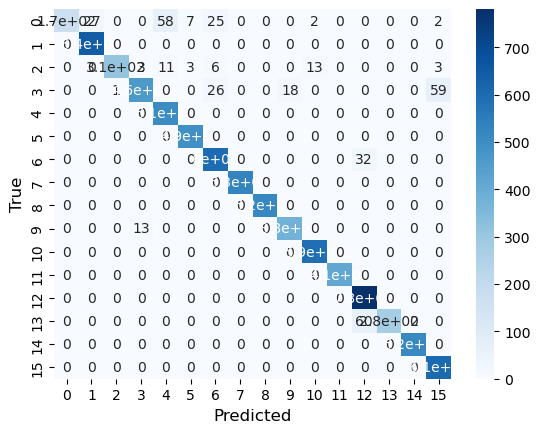

In [16]:
import seaborn as sns
from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 lr.predict(x_train)), 2))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [17]:
from sklearn.metrics import classification_report
b=metrics.classification_report(y_test,y_pred)
print(b)

              precision    recall  f1-score   support

    Assamese       1.00      0.59      0.74       293
     Bengali       0.96      1.00      0.98       645
    Gujarati       1.00      0.89      0.94       351
     Kannada       0.97      0.82      0.89       567
    Kashmiri       0.88      1.00      0.94       506
    Konakani       0.98      1.00      0.99       493
    Maithili       0.91      0.95      0.93       630
   Malayalam       1.00      1.00      1.00       528
    Manipuri       1.00      1.00      1.00       519
     Marathi       0.95      0.97      0.96       389
      Nepali       0.98      1.00      0.99       590
       Oriya       1.00      1.00      1.00       414
     Punjabi       0.89      1.00      0.94       781
      Sindhi       1.00      0.82      0.90       335
       Tamil       1.00      1.00      1.00       517
      Telugu       0.90      1.00      0.95       609

    accuracy                           0.95      8167
   macro avg       0.96   

In [18]:
y_pred

array(['Punjabi', 'Gujarati', 'Oriya', ..., 'Tamil', 'Manipuri',
       'Maithili'], dtype=object)

In [19]:
len(y_pred)

8167

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9548181706869108


In [21]:
y_validate=lr.predict(x_val)

C:\Users\vinaydeekshitGarimel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [22]:
y_validate

array(['Manipuri', 'Punjabi', 'Kashmiri', ..., 'Kannada', 'Manipuri',
       'Konakani'], dtype=object)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val,y_validate))

0.9506550753030488


In [24]:
y_test

50513     Punjabi
23244    Gujarati
70569       Oriya
56177     Punjabi
48058      Sindhi
           ...   
63399       Tamil
21488    Gujarati
63238       Tamil
42035    Manipuri
5484     Assamese
Name: Language_Main, Length: 8167, dtype: object

In [25]:
y_pred

array(['Punjabi', 'Gujarati', 'Oriya', ..., 'Tamil', 'Manipuri',
       'Maithili'], dtype=object)

In [26]:
y_val

40783     Manipuri
55825      Punjabi
2450      Kashmiri
10726     Maithili
19766    Malayalam
           ...    
65074        Tamil
60508       Nepali
38197      Kannada
43422     Manipuri
30830     Konakani
Name: Language_Main, Length: 8167, dtype: object

In [27]:
y_validate

array(['Manipuri', 'Punjabi', 'Kashmiri', ..., 'Kannada', 'Manipuri',
       'Konakani'], dtype=object)

In [28]:
x_test.shape

(8167, 4055)

In [29]:
x_val.shape

(8167, 4055)

In [30]:
y_test.shape

(8167,)

In [31]:
y_pred.shape

(8167,)

In [32]:
y_val.shape

(8167,)

In [33]:
y_validate.shape

(8167,)

In [34]:
#Validation Accuracy- 94.01%
#Test Accuracy-94.28%

In [35]:
kf = pd.DataFrame(y_pred)
print(kf)

             0
0      Punjabi
1     Gujarati
2        Oriya
3      Punjabi
4       Sindhi
...        ...
8162     Tamil
8163  Gujarati
8164     Tamil
8165  Manipuri
8166  Maithili

[8167 rows x 1 columns]


In [36]:
lf=pd.DataFrame(y_test)
print(lf)

      Language_Main
50513       Punjabi
23244      Gujarati
70569         Oriya
56177       Punjabi
48058        Sindhi
...             ...
63399         Tamil
21488      Gujarati
63238         Tamil
42035      Manipuri
5484       Assamese

[8167 rows x 1 columns]


In [37]:
kf.columns=['y_pred']
print(kf)

        y_pred
0      Punjabi
1     Gujarati
2        Oriya
3      Punjabi
4       Sindhi
...        ...
8162     Tamil
8163  Gujarati
8164     Tamil
8165  Manipuri
8166  Maithili

[8167 rows x 1 columns]


In [38]:
p=pd.DataFrame(lf)
p

,Language_Main
50513,Punjabi
23244,Gujarati
70569,Oriya
56177,Punjabi
48058,Sindhi
...,...
63399,Tamil
21488,Gujarati
63238,Tamil
42035,Manipuri


In [39]:
q=pd.DataFrame(kf)
q

,y_pred
0,Punjabi
1,Gujarati
2,Oriya
3,Punjabi
4,Sindhi
...,...
8162,Tamil
8163,Gujarati
8164,Tamil
8165,Manipuri


In [40]:
z = pd.concat([p.reset_index(drop=True), q.reset_index(drop=True)], axis=1)

In [41]:
z

,Language_Main,y_pred
0,Punjabi,Punjabi
1,Gujarati,Gujarati
2,Oriya,Oriya
3,Punjabi,Punjabi
4,Sindhi,Sindhi
...,...,...
8162,Tamil,Tamil
8163,Gujarati,Gujarati
8164,Tamil,Tamil
8165,Manipuri,Manipuri


In [42]:
z['is_equal'] = (z['Language_Main']==z['y_pred'])
print(z)

     Language_Main    y_pred  is_equal
0          Punjabi   Punjabi      True
1         Gujarati  Gujarati      True
2            Oriya     Oriya      True
3          Punjabi   Punjabi      True
4           Sindhi    Sindhi      True
...            ...       ...       ...
8162         Tamil     Tamil      True
8163      Gujarati  Gujarati      True
8164         Tamil     Tamil      True
8165      Manipuri  Manipuri      True
8166      Assamese  Maithili     False

[8167 rows x 3 columns]


In [43]:
count=0
for i in z['is_equal']:
    if(i==True):
        count+=1
print(count)

7798


In [44]:
#Test set
#469-false
#7698-True

In [45]:
af = pd.DataFrame(y_validate)
print(af)

              0
0      Manipuri
1       Punjabi
2      Kashmiri
3      Maithili
4     Malayalam
...         ...
8162      Tamil
8163     Nepali
8164    Kannada
8165   Manipuri
8166   Konakani

[8167 rows x 1 columns]


In [46]:
af.columns=['y_validate']
print(af)

     y_validate
0      Manipuri
1       Punjabi
2      Kashmiri
3      Maithili
4     Malayalam
...         ...
8162      Tamil
8163     Nepali
8164    Kannada
8165   Manipuri
8166   Konakani

[8167 rows x 1 columns]


In [47]:
cf = pd.DataFrame(y_val)
print(cf)

      Language_Main
40783      Manipuri
55825       Punjabi
2450       Kashmiri
10726      Maithili
19766     Malayalam
...             ...
65074         Tamil
60508        Nepali
38197       Kannada
43422      Manipuri
30830      Konakani

[8167 rows x 1 columns]


In [48]:
cf.columns=['y_val']
print(cf)

           y_val
40783   Manipuri
55825    Punjabi
2450    Kashmiri
10726   Maithili
19766  Malayalam
...          ...
65074      Tamil
60508     Nepali
38197    Kannada
43422   Manipuri
30830   Konakani

[8167 rows x 1 columns]


In [49]:
y=pd.DataFrame(af)
y

,y_validate
0,Manipuri
1,Punjabi
2,Kashmiri
3,Maithili
4,Malayalam
...,...
8162,Tamil
8163,Nepali
8164,Kannada
8165,Manipuri


In [50]:
z=pd.DataFrame(cf)
z

,y_val
40783,Manipuri
55825,Punjabi
2450,Kashmiri
10726,Maithili
19766,Malayalam
...,...
65074,Tamil
60508,Nepali
38197,Kannada
43422,Manipuri


In [51]:
h= pd.concat([z.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

In [52]:
h

,y_val,y_validate
0,Manipuri,Manipuri
1,Punjabi,Punjabi
2,Kashmiri,Kashmiri
3,Maithili,Maithili
4,Malayalam,Malayalam
...,...,...
8162,Tamil,Tamil
8163,Nepali,Nepali
8164,Kannada,Kannada
8165,Manipuri,Manipuri


In [53]:
h['is_equal'] = (h['y_val']==h['y_validate'])
print(h)

          y_val y_validate  is_equal
0      Manipuri   Manipuri      True
1       Punjabi    Punjabi      True
2      Kashmiri   Kashmiri      True
3      Maithili   Maithili      True
4     Malayalam  Malayalam      True
...         ...        ...       ...
8162      Tamil      Tamil      True
8163     Nepali     Nepali      True
8164    Kannada    Kannada      True
8165   Manipuri   Manipuri      True
8166   Konakani   Konakani      True

[8167 rows x 3 columns]


In [54]:
count=0
for i in h['is_equal']:
    if(i==False):
        count+=1
print(count)

403


In [55]:
#validation set Total-8167
#7678-True
#487-False
#5.6% data is mismatched
#94.4% data is predicted True

In [56]:
x_train

,First_Name_10K+,First_Name_Aaarti,First_Name_Aabha,First_Name_Aabharan,First_Name_Aabharana,First_Name_Aabhas,First_Name_Aabhat,First_Name_Aabheer,First_Name_Aabheri,First_Name_Aabhya,...,Surname_Varghese,Surname_Venkatraman,Surname_Verma,Surname_Vijayan,Surname_Vikram,Surname_VikramSarabhai,Surname_Virk,Surname_Wadia,Surname_Wani,Surname_Yadav
78738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y_train

78738     Marathi
67864       Oriya
6981     Assamese
63643       Tamil
53177     Punjabi
           ...   
39445     Kannada
31891    Konakani
12461    Maithili
31097    Konakani
61743      Nepali
Name: Language_Main, Length: 65334, dtype: object

In [58]:
x_val

,First_Name_10K+,First_Name_Aaarti,First_Name_Aabha,First_Name_Aabharan,First_Name_Aabharana,First_Name_Aabhas,First_Name_Aabhat,First_Name_Aabheer,First_Name_Aabheri,First_Name_Aabhya,...,Surname_Varghese,Surname_Venkatraman,Surname_Verma,Surname_Vijayan,Surname_Vikram,Surname_VikramSarabhai,Surname_Virk,Surname_Wadia,Surname_Wani,Surname_Yadav
40783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y_val

40783     Manipuri
55825      Punjabi
2450      Kashmiri
10726     Maithili
19766    Malayalam
           ...    
65074        Tamil
60508       Nepali
38197      Kannada
43422     Manipuri
30830     Konakani
Name: Language_Main, Length: 8167, dtype: object

In [60]:
y_test

50513     Punjabi
23244    Gujarati
70569       Oriya
56177     Punjabi
48058      Sindhi
           ...   
63399       Tamil
21488    Gujarati
63238       Tamil
42035    Manipuri
5484     Assamese
Name: Language_Main, Length: 8167, dtype: object

In [61]:
print("Train accuracy:",(accuracy_score(y_train, lr.predict(x_train)), 2))

C:\Users\vinaydeekshitGarimel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Train accuracy: (0.9565769737043499, 2)


In [62]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.9548181706869108


C:\Users\vinaydeekshitGarimel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [63]:
#Training accurcay-94.37
#Testing Accuracy-94.25
#validation Accuracy-94.03

In [64]:
import pickle
# saved_model=pickle.dumps(lr)
# model= pickle.loads(saved_model)
# model.predict(x_test)

In [65]:
# from joblib import Parallel, delayed
# import joblib
# joblib.dump(lr, 'filename.pkl')
# model1 = joblib.load('model.pkl')
# # Use the loaded model to make predictions
# model1.predict(x_test)

In [66]:
filename='model.pkl'
pickle.dump(lr, open(filename, "wb"))

In [67]:
names_gen1=pd.read_csv(r"C:\Users\vinaydeekshitGarimel\Downloads\project\names_data_autogen_full - Copy.csv")

In [72]:
b=names_gen1.dropna(how='all').dropna(how='all',axis=1)
b = b.drop(['Sno', 'Middle Name', 'Language_Main'], axis=1)
b

,First_Name,Surname
0,Eswar,Benarjee
1,Hiranya,Durrani
2,Bhupendra,Tikkoo
3,Mrigavati,Durrani
4,Smriti,Raina
...,...,...
81664,Kiran,Shirke
81665,Dhriti,Ahale
81666,Bhavani,Bhede
81667,Ghanika,Shirke


In [73]:
# x -> Get DUmmies / One Hot Encoding
data1=pd.get_dummies(b,columns=['First_Name','Surname'])

In [74]:
data1

,First_Name_10K+,First_Name_Aaarti,First_Name_Aabha,First_Name_Aabharan,First_Name_Aabharana,First_Name_Aabhas,First_Name_Aabhat,First_Name_Aabheer,First_Name_Aabheri,First_Name_Aabhya,...,Surname_Varghese,Surname_Venkatraman,Surname_Verma,Surname_Vijayan,Surname_Vikram,Surname_VikramSarabhai,Surname_Virk,Surname_Wadia,Surname_Wani,Surname_Yadav
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
predictions = lr.predict(data1)

C:\Users\vinaydeekshitGarimel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [3]:
predictions[0]

NameError: name 'predictions' is not defined

In [ ]:
#new_df = x_train.idxmax(axis=1)